**2da parte: Operaciones típicas para un análisis. Limpieza de datos, análisis de datos para análisis estadístico, uso de numpy, una biblioteca científica de Python, visualización de datos mediante la biblioteca Seaborn, tratamiento de valores atípicos y uso de la distribución normal.**

**2nd part: Typical operations for an analysis. Cleaning data, parsing data for statistical analysis, using numpy, a scientific Python library, visualizing data using the Seaborn library, dealing with outliers, and using normal distribution.**

Este conjunto de datos registra los detalles y las preferencias de miles de usuarios del sitio web de StackOverflow. Aquí solo se muestran 999 datos de esos miles.

This dataset records the details and preferences of thousands of users of the StackOverflow website. Only 999 of those thousands of data are shown here.

In [87]:
import pandas as pd

In [88]:
so_survey_df = pd.read_csv('so_survey.csv')
print(so_survey_df.head())

      SurveyDate                                    FormalEducation  \
0  2/28/18 20:20           Bachelor's degree (BA. BS. B.Eng.. etc.)   
1  6/28/18 13:26           Bachelor's degree (BA. BS. B.Eng.. etc.)   
2    6/6/18 3:37           Bachelor's degree (BA. BS. B.Eng.. etc.)   
3    5/9/18 1:06  Some college/university study without earning ...   
4  4/12/18 22:41           Bachelor's degree (BA. BS. B.Eng.. etc.)   

   ConvertedSalary Hobby       Country  StackOverflowJobsRecommend  \
0              NaN   Yes  South Africa                         NaN   
1          70841.0   Yes       Sweeden                         7.0   
2              NaN    No       Sweeden                         8.0   
3          21426.0   Yes       Sweeden                         NaN   
4          41671.0   Yes            UK                         8.0   

      VersionControl  Age  Years Experience Gender   RawSalary  
0                Git   21                13   Male         NaN  
1     Git;Subversion  

In [89]:
so_survey_df.tail()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,France,NaN,Subversion,45,10,Male,NaN
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,Spain,8.0,Git,27,16,Male,"58,746.00"
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,USA,NaN,Git,54,16,Male,"$55,000.00"
997,2/5/18 20:01,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,Sweeden,NaN,Git;Subversion,23,9,NaN,NaN
998,2/11/18 21:23,Bachelor's degree (BA. BS. B.Eng.. etc.),1000000.0,No,Russia,NaN,Git,18,7,NaN,"1,000,000.00"


In [90]:
so_survey_df.shape

(999, 11)

In [91]:
# Es muy útil saber no solo el nombre de cada columna, sino también su tipo.
# It is very useful to know not only the name of each column, but also its type.
print(so_survey_df.dtypes)

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


In [92]:
# Crear un subconjunto de solo las columnas numéricas
# Create a subset of just the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int', 'float'])
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


In [93]:
#Voy a convertir el NaN a float 0.0, otra opción sería eliminar filas con NaN (no mayor a 20%)
#I am going to convert the NaN to float 0.0, another option would be to delete rows with NaN (no greater than 20%)
so_survey_df['ConvertedSalary'] = so_survey_df['ConvertedSalary'].fillna(0.0)

# Para muchos valores continuos le importará menos el valor exacto, sino, una categoría, en este caso 5 bin
# For many continuous values you will care less about the exact value, but rather a category, in this case 5 bin
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 5)

# Imprimir las primeras 5 filas de la columna equal_binned
# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0  (-2000.0, 400000.0]              0.0
1  (-2000.0, 400000.0]          70841.0
2  (-2000.0, 400000.0]              0.0
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


In [94]:
import numpy as np

# Especificar los límites de los contenedores
# Specify container boundaries
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# niveles de contenedores
# container levels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Transformando la variable continua ConvertedSalary a categórica
# Transforming the continuous variable ConvertedSalary to categorical
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins, labels = labels)

# Imprimimos las 5 primeras filas de la columna boundary_binned
# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0        Very low              0.0
1          Medium          70841.0
2        Very low              0.0
3             Low          21426.0
4             Low          41671.0


Text(0.5, 1.0, 'Category Salary')

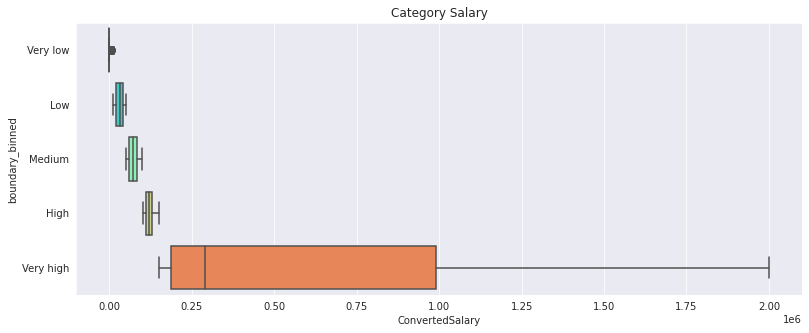

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ahora haremos un gráfico con variables categóricas y continuas
# Now we will make a graph with categorical and continuous variables
plt.figure(figsize=(13,5))
sns.boxplot(x=so_survey_df['ConvertedSalary'],y=so_survey_df['boundary_binned'], palette='rainbow')
plt.title("Category Salary")

**¿Por qué existen valores perdidos?**

___
- ¿Cómo se produce ésto?
    - Los datos no son recolectados adecuadamente
    - Errores de manejo en la colección
    - Datos intencionalmente omitidos
    - Podrían generarse por transformaciones mal hechas de la data 

- Comando útiles:
- pd.info()
- pd.isnull()
- pd.isnull().sum()
- df.notnull()

**Why are there missing values?**

___
- How does this occur?
    - Data is not collected properly
    - Handling errors in the collection
    - Data intentionally omitted
    - They could be generated by poorly done transformations of the data

- Useful command:
- pd.info()
- pd.isnull()
- pd.isnull().sum()
- df.notnull()
___

In [96]:
#La mayoría de los conjuntos de datos contienen valores faltantes, a menudo representados como NaN
#Most data sets contain missing values, often represented as NaN

# Exploremos este subset
# Let's explore this subset
sub_df = so_survey_df[['Age', 'Gender']]

# imprimimos lo valores faltantes
# print the missing values
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     999 non-null    int64 
 1   Gender  693 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


In [97]:
# Para imprimir el número de filas y columnas usamos el atributo shape
# To print the number of rows and columns we use the shape attribute
print(so_survey_df.shape)

(999, 13)


In [98]:
# Crear un nuevo df para borrar filas de valores faltantes
# Create a new df to delete rows of missing values
no_missing_values_rows = so_survey_df.dropna()

# Imprimir nuevamente la dimensión
# Print the dimension again
print(no_missing_values_rows.shape)

(264, 13)


In [99]:
# Es mala idea borrar tantos datos, recomendable es borrar sólo las columnas con filas incompletas
# It is a bad idea to delete so much data, it is advisable to delete only the columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Imprimir nuevamente la dimensión
# Print the dimension again
print(no_missing_values_cols.shape)

(999, 10)


In [100]:
# Rellenar de NaN donde falta sexo
# Fill with NaN where sex is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

# Imprimir nuevamente la dimensión
# Print the dimension again
print(no_gender.shape)

# Hay que tener mucho cuidado cuando son muchos los valores perdidos (> 20% es mucho), por lo tanto, no se pueden borrar tantas filas
# You have to be very careful when there are many missing values (> 20% is a lot), therefore, you cannot delete so many rows

(693, 13)


In [101]:
# imprimiendo el conteo de categorías de la columna Gender:
# printing the category count of the Gender column:
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64


In [102]:
# reemplazar valores perdidos
# replace missing values
so_survey_df['Gender'].fillna(value='Not Given', inplace=True)

# volver a imprimir el conteo de la columna Gender:
# reprint the Gender column count:
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64


- Si se eliminan muchos datos, ¿Qué se puede hacer?
    - **Columnas categóricas**: Se puede reemplazar por el valor más común o el tipo 'None', ya hecho en el ejemplo anterior.
    - **Columnas numéricas**: Reemplazar valores perdidos por la media o mediana.
    
- If a lot of data is deleted, what can be done?
    - **Categorical columns**: It can be replaced by the most common value or the type 'None', already done in the previous example.
    - **Numeric columns**: Replace missing values with the mean or median.

In [103]:
#Relleno de valores faltantes continuos
#Filling continuous missing values
# Imprimimos las primeras cinco filas de la columna StackOverflowJobsRecommend y otras inspecciones
# We print the first five rows of the StackOverflowJobsRecommend column and inspect others
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [104]:
print(so_survey_df['StackOverflowJobsRecommend'].isnull().sum())

512


In [105]:
# Rellena los valores que faltan con la media
# Fill in missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Imprimimos las primeras cinco filas de nuevo de la columna StackOverflowJobsRecommend para observar
# We print the first five rows again from the StackOverflowJobsRecommend column to observe
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.061602
1    7.000000
2    8.000000
3    7.061602
4    8.000000
Name: StackOverflowJobsRecommend, dtype: float64


In [106]:
# Redondeamos los valores de StackOverflowJobsRecommend
# We round the values of StackOverflowJobsRecommend
import numpy as np
so_survey_df['StackOverflowJobsRecommend'] = np.round(so_survey_df['StackOverflowJobsRecommend'])

# Imprimimos las primeras cinco filas
# We print the first five rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [107]:
print(so_survey_df['StackOverflowJobsRecommend'].isnull().sum())

0


#**Tratar con otros problemas de datos**
Removiendo expresiones regulares de los números.

#**Deal with other data issues**
Removing regular expressions from numbers.

In [108]:
# Inspeccionando la columna RawSalary
# Inspecting the RawSalary column
print(so_survey_df['RawSalary'].head(30))

0            NaN
1      70,841.00
2            NaN
3      21,426.00
4     £41,671.00
5     120,000.00
6            NaN
7     250,000.00
8            NaN
9           0.00
10     47,904.00
11           NaN
12     95,968.00
13           NaN
14        420.00
15    £75,000.00
16    £10,958.00
17    $51,408.00
18    $72,611.00
19    900,000.00
20           NaN
21    $30,000.00
22           NaN
23     44,000.00
24    $60,000.00
25           NaN
26     80,000.00
27           NaN
28           NaN
29           NaN
Name: RawSalary, dtype: object


In [109]:
# Removiendo comas, en ambos casos primero transformamos la columna de objeto a string
# Removing commas, in both cases we first transform the column from object to string
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

# Removiendo expresiones regulares con símbolo dólar
# Removing regular expressions with dollar symbol
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')

/home/alejandro/.pyenv/versions/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [110]:
# Convertir la columna a valores numéricos
# Convert column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Encuentrar los índices de valores faltantes
# Find indexes of missing values
idx = numeric_vals.isna()

# Imrimir las filas relevates
# Print relevant rows
print(so_survey_df['RawSalary'][idx].head(10))

0           NaN
2           NaN
4     £41671.00
6           NaN
8           NaN
11          NaN
13          NaN
15    £75000.00
16    £10958.00
20          NaN
Name: RawSalary, dtype: object


In [111]:
from numpy.core.multiarray import dtype
# Removiendo expresiones regulares con símbolo de libra esterlina
# Removing regular expressions with pound sterling symbol
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')

# Covertir la colunma de objeto a float
# Convert column from object to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')

# Imrimir la columna y su tipo
# Print the column and its type
print(so_survey_df['RawSalary'])
print(dtype(so_survey_df['RawSalary']))

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64
float64


**Distribución Normal o Gaussiana**
___
- La mayoría de los modelos asumen que sus datos están normalmente distribuidos y/o en la misma escala
    - 1 sd = 66.27%; 2 sd = 95.45%; 3 sd = 99.73%
___

**Normal or Gaussian Distribution**

 - Most models assume that your data are normally distributed and/or on the same scale
      - 1 sd = 66.27%; 2 sd = 95.45%; 3 sd = 99.73%

**Uso de la distribución normal**
___
- Haremos un par de predicciones para la altura de jugadores, previa comprobación de que los datos se comportan como una distribución normal
___

**Using the normal distribution**
___
- We will make a couple of predictions for the height of players, after checking that the data behaves like a normal distribution
___

In [112]:
# Trabajaremos sobre los datos de los Juegos Olímpicos de Río de Janeiro 2016. 
# Y mostraremos las alturas de los jugadores de voleibol y baloncesto.
# We will work on data from the 2016 Rio de Janeiro Olympic Games.
# And we will show the heights of volleyball and basketball players.
df_olympic = pd.read_csv('athlete_events.csv')
df_olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [113]:
df_olympic.shape

(271116, 15)

In [114]:
# Básicamete esta función es de uso recurrete para construir gráficos
# Basically this function is used to build graphs
def label_graph(ticksfont , x_label , y_label , title_label , fontsize):
    
    plt.xticks(fontsize = ticksfont)
    plt.yticks(fontsize = ticksfont)

    plt.xlabel(x_label, fontsize = fontsize)
    plt.ylabel(y_label , fontsize = fontsize)
    plt.title(title_label, fontsize = fontsize)

/home/alejandro/.pyenv/versions/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


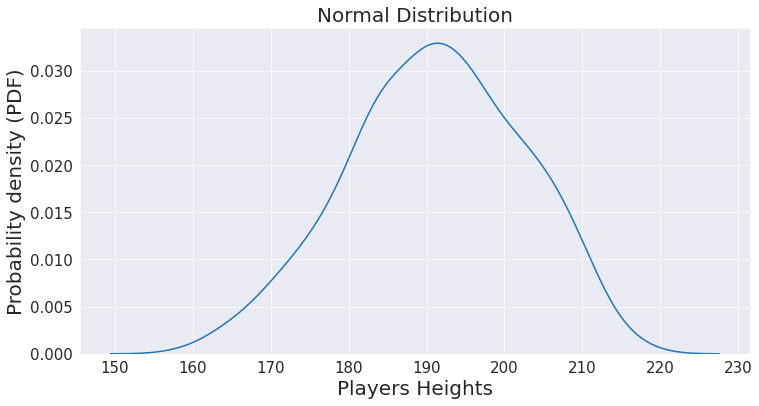

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
sports_hall = ['Volleyball' , 'Basketball']
basket_volley = df_olympic[(df_olympic['Year'] == 2016) & df_olympic['Sport'].isin(sports_hall)]
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(basket_volley['Height'] , kde = True , hist = False)
# etiquetar el eje
# label the axis
label_graph(15 , 'Players Heights' , 'Probability density (PDF)' ,'Normal Distribution' , 20 ) 

Como podemos ver, estos datos se distribuyen en una distribución normal y el eje y representa la probabilidad.

As we can see, this data is distributed in a normal distribution and the y-axis represents the probability.

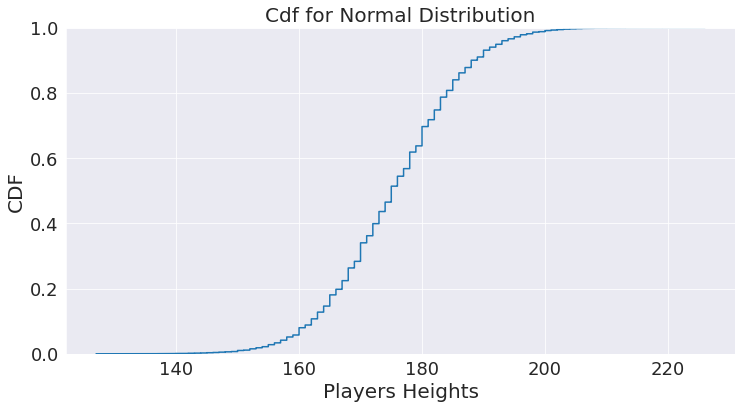

In [116]:
# La CDF (Cumulative distribution function) proporciona la probabilidad acumulada de cada valor de x.
# The CDF (Cumulative distribution function) provides the cumulative probability of each value of x.
fig, ax = plt.subplots(figsize=(12,6))
sns.ecdfplot(data=df_olympic, x="Height")
# ejes marcados
# label axis
label_graph(18,'Players Heights',  'CDF', 'Cdf for Normal Distribution', 20)

Test de Normalidad. Podemos probar la normalidad de muchas maneras, pero nos centraremos sólo en esta visualización llamada cuantil-cuantil o gráfico Q — Q.

Normality Test. We can test for normality in many ways, but we will focus only on this visualization called the quantile-quantile or Q — Q plot.

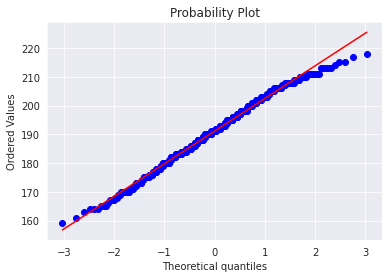

In [117]:
from scipy import stats
stats.probplot(basket_volley['Height'], dist = 'norm' , plot=plt) 
plt.show()

Los puntos azules representan nuestros datos y la línea diagonal representa la distribución normal. Si los puntos de datos siguen la línea diagonal, los datos se distribuirán normalmente.
The blue dots represent our data and the diagonal line represents the normal distribution. If the data points follow the diagonal line, the data will be normally distributed.

La distribución normal estándar, también llamada distribución Z, es una distribución de probabilidad continua y es una distribución normal especial donde la media de la distribución Z es siempre 0 y la desviación estándar = 1.
The standard normal distribution, also called the Z distribution, is a continuous probability distribution and is a special normal distribution where the mean of the Z distribution is always 0 and the standard deviation = 1.

**Ejemplo 1.** Tomemos la distribución Z para las alturas de los jugadores, si tomamos un jugador al azar. ¿Cuál es la probabilidad de que la altura del jugador supere los 195 centímetros?

**Example 1.** Let's take the Z distribution for the heights of the players, if we take a random player. What is the probability that the player's height exceeds 195 centimeters?

In [118]:
import numpy as np
mu = np.mean(basket_volley['Height'])
std = np.std(basket_volley['Height'])
cdf_195 = stats.norm(loc = mu , scale = std).cdf(195)
probability = 1- cdf_195
print('La probabilidad es {} o {}%'.format(round(probability , 2) , round(probability*100 , 2)))

La probabilidad es 0.37 o 36.63%


**Ejemplo 2.** ¿Cuál es la probabilidad de que la altura de un jugador tomado al azar sea menor de 170 centímetros?

**Example 2.** What is the probability that the height of a player taken at random is less than 170 centimeters?

In [119]:
prob = stats.norm(loc = mu , scale = std).cdf(170)
print('La probabilidad es {} o {}%'.format(round(prob , 2) , round(prob*100 , 2)))

La probabilidad es 0.03 o 3.11%


**Ejemplo 3.** ¿Cuál es la probabilidad de que la altura del jugador esté entre 170 y 185 centímetros?

**Example 3.** What is the probability that the player's height is between 170 and 185 centimeters?

In [120]:
cdf_upper = stats.norm(loc = mu , scale = std).cdf(185)
cdf_lower = stats.norm(loc = mu , scale = std).cdf(170)
 
prob = cdf_upper - cdf_lower
print('La probabilidad es {} o {}%'.format(round(prob , 2) , round(prob*100 , 2)))

La probabilidad es 0.26 o 26.32%


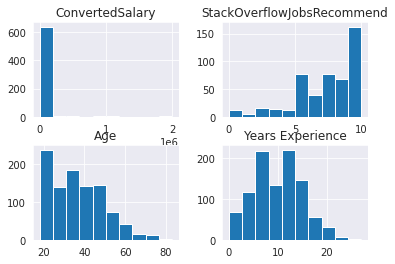

In [121]:
# Volviendo a la data so_survey trataremos datos que no siguen una distrubución normal
# Returning to the so_survey data we will process data that does not follow a normal distribution
import matplotlib.pyplot as plt
import seaborn as sns
# Creamos un histograma de las variables numéricas
# We create a histogram of the numerical variables
so_numeric_df.hist()
plt.show()

In [122]:
# A menudo es útil el resumen estadístico
# Statistical summary is often useful
print(so_numeric_df.describe())

       ConvertedSalary  StackOverflowJobsRecommend         Age  \
count     6.650000e+02                  487.000000  999.000000   
mean      9.256517e+04                    7.061602   36.003003   
std       2.091344e+05                    2.621591   13.255127   
min       0.000000e+00                    0.000000   18.000000   
25%       2.755000e+04                    5.000000   25.000000   
50%       5.556200e+04                    7.000000   35.000000   
75%       8.823800e+04                   10.000000   45.000000   
max       2.000000e+06                   10.000000   83.000000   

       Years Experience  
count        999.000000  
mean           9.961962  
std            4.878129  
min            0.000000  
25%            7.000000  
50%           10.000000  
75%           13.000000  
max           27.000000  


**Transformación Log a normal**
___
    - puede hacer que las distribuciones altamente sesgadas sean menos sesgadas
    - PowerTransformer() del módulo de preprocesamiento scikit-learn
___

**Log to normal transformation**
___
    - can make highly skewed distributions less skewed
    - PowerTransformer() from scikit-learn preprocessing module
___

/home/alejandro/.pyenv/versions/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


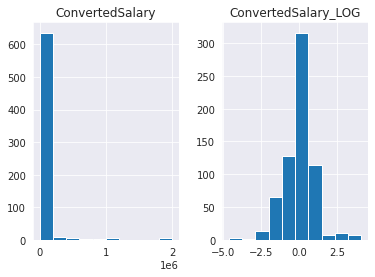

In [123]:
# Transformación Log

# En muchos casos la distribución tiene una cola larga donde los datos 
# no se distribuyen normalmente, acá es útil esta transformación

# Log Transformation

# In many cases the distribution has a long tail where the data
# are not normally distributed, this transformation is useful here

# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Se crea una instancia PowerTransformer
# A PowerTransformer instance is created
pow_trans = PowerTransformer()

# Se debe entrenar la transformación en los datos
# The transformation must be trained on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Aplicar la transformación de potencia a los datos
# Apply power transformation to data
so_numeric_df['ConvertedSalary_LOG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Graficar los datos antes y después de la transformación para notar la diferencia
# Plot the data before and after the transformation to notice the difference
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LOG']].hist()
plt.show()

¿Notaste el cambio en la forma de la distribución?
La columna ConvertedSalary_LOG se ve mucho más normal que la original
Columna ConvertedSalary.La utilidad de esto es calcular probabilidades con la distribución normal como lo hicimos para el caso de los basquetbolistas.

Did you notice the change in the shape of the distribution?
The ConvertedSalary_LOG column looks much more normal than the original
ConvertedSalary column. The usefulness of this is to calculate probabilities with the normal distribution as we did for the case of basketball players.

Usar la mediana en lugar de la media es recomendable para ciertas situaciones, principalmente en datos sesgados, es decir, cuando la distribución de los datos está sesgada hacia un extremo, la media puede verse afectada por los valores extremos y no proporcionar una representación adecuada de la tendencia central de los datos. Otras situaciones con datos categóricos, datos con distribuciones asimétricas y datos con muchos valores atípicos. En los siguientes análisis se usan los diagramas de caja que se basan en la mediana y los percentiles también relacionados a ella. Los cuartiles es básicamente dividir el espectro de datos en 4 partes, para esto usamos 3 cuartiles. Por ejemplo, el segundo cuartil (Q2), es el valor que separa el 50% inferior de los datos del 50% superior. El segundo cuartil es equivalente a la mediana de los datos.

Using the median instead of the mean is advisable for certain situations, mainly in skewed data, that is, when the distribution of the data is skewed towards one extreme, the mean may be affected by the extreme values ​​and not provide an adequate representation of the central tendency of the data. Other situations with categorical data, data with skewed distributions, and data with many outliers. In the following analyzes box plots are used that are based on the median and the percentiles also related to it. Quartiles are basically dividing the data spectrum into 4 parts, for this we use 3 quartiles. For example, the second quartile (Q2), is the value that separates the bottom 50% of the data from the top 50%. The second quartile is equivalent to the median of the data.

**Diagrama de cajas**
___

- Profundizando más con diagramas de caja
    - Rango intercuartil (IQR) = 25th (Q1) percentil a 75th (Q3) percentil
    - Minimo = Q1 - 1.5 IQR
    - Máximo = Q3 + 1.5 IQR
    - Los valores atípicos están fuera del mínimo y máximo
___

**Box plot**
___

- Going deeper with box plots
    - Interquartile range (IQR) = 25th (Q1) percentile to 75th (Q3) percentile
    - Minimum = Q1 - 1.5 IQR
    - Maximum = Q3 + 1.5 IQR
    - Outliers are outside the minimum and maximum
___

**Removiendo outliers**
___
- Detección basada en quantiles (en la función utilizada a continuación usamos los percentiles, ya que, quantiles se refiere a la familia de divisores del espectro. Ejemplos, cuartiles, quintiles, percentiles, etc)
- Detección basada en Desviación estándard
___

**Removing outliers**
___
- Detection based on quantiles (in the function used below we use percentiles, since quantiles refers to the family of divisors of the spectrum. Examples, quartiles, quintiles, percentiles, etc.)
- Detection based on Standard Deviation
___

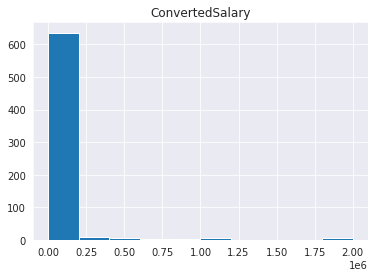

<Figure size 432x288 with 0 Axes>

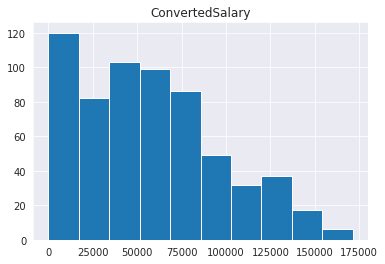

In [124]:
# Detección basada en quantiles
#Quantile-based detection

# Encontrar el 95th percentil
# Find the 95th percentile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Recortar los outliers
# Trim outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# Graficamos el histograma original
# We plot the original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# Graficamos el histograma con los outliers eliminados
# We plot the histogram with the outliers removed
trimmed_df[['ConvertedSalary']].hist()
plt.show()

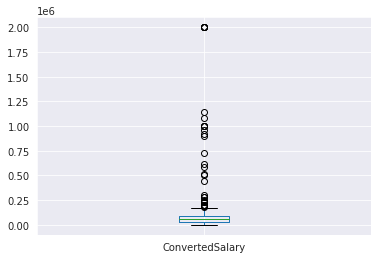

In [125]:
# Crear un boxplot de ConvertedSalary original
# Create a boxplot of original ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

En el siguiente ejercicio, trabajará con un enfoque estadísticamente más sólido (robusto) para eliminar los valores atípicos.

In the following exercise, you will work with a more statistically sound (robust) approach to removing outliers.

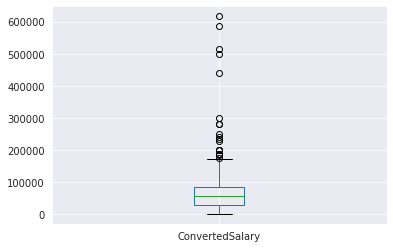

In [126]:
# Remoción estadística de outliers

# El inconveniente que tiene el método anterior es que se eliminan
# constantemente la misma proporción de outliers, otra manera de abordar
# este problema es eliminar los valores atípicos que están sobre 
# 3 desviaciones estándard y bajo 3 desviaciones estándard

# Statistical removal of outliers

# The drawback of the previous method is that they eliminate
# constantly the same proportion of outliers, another way of approaching
# this problem is to remove the outliers that are above
# 3 standard deviations and under 3 standard deviations

# 1ro encontramos la media y SD de la columna de interés
#1st we find the mean and SD of the column of interest
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculamos el cutoff
# We calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Removemos los outliers
# We remove the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) \
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# graficamos el box plot con los valores removidos
# we plot the box plot with the values removed
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

¿Notaste el cambio de escala en el eje y?
Note que antes los valores atípicos llegaban hasta 2.000.000, ahora sólo hasta 600.000. 
Por lo tanto, esta será la data con la que trabajaremos para predicciones. Strong

Did you notice the change in scale on the y-axis?
Note that before the outliers reached up to 2,000,000, now they only reach up to 600,000.
Therefore, this will be the data with which we will work for predictions. strong